## Ансамбли и полносвязные нейронные сети
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.76$ - 0 баллов
- $0.76 < AUC \leq 0.77$ - 2 балла
- $0.77 < AUC \leq 0.78$ - 4 балла
- $0.78 < AUC \leq 0.79$ - 6 баллов
- $0.79 < AUC \leq 0.80$ - 8 баллов
- $AUC > 0.80$ - 10 баллов


In [235]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [236]:
data = pd.read_csv('german.csv', sep=';')
print(data.head())

X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()

df = data[[
'Account_Balance',
'Duration_of_Credit_monthly', 
'Payment_Status_of_Previous_Credit', 
'Credit_Amount', 
'Age_years', 
'Most_valuable_available_asset', 
'Sex_Marital_Status', 
'Duration_in_Current_address', 
'No_of_Credits_at_this_Bank', 
'Guarantors', 
'Foreign_Worker'
]]
X = df.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=42)

   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

<Axes: >

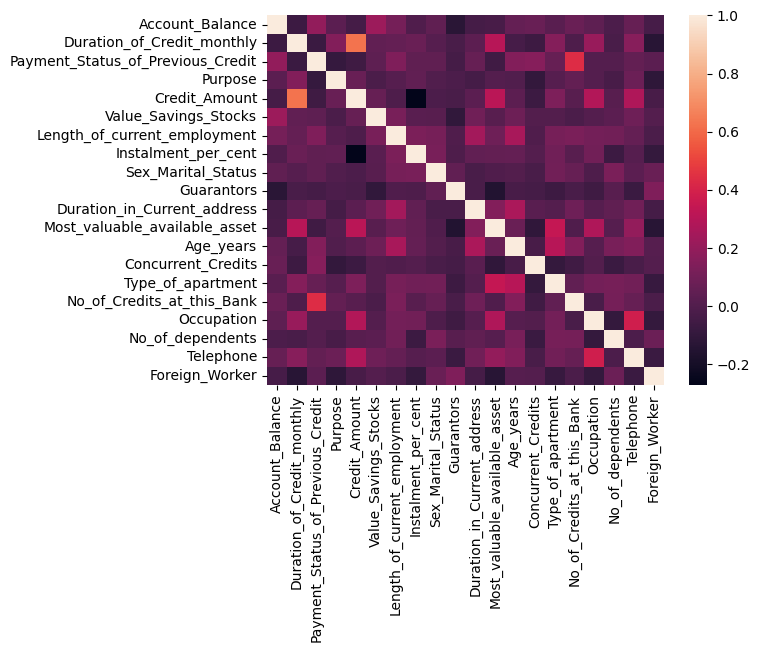

In [237]:
sns.heatmap(data.iloc[:, 1:].corr())

In [238]:
missing_values = data.isnull().sum()

print(missing_values)

Creditability                        0
Account_Balance                      0
Duration_of_Credit_monthly           0
Payment_Status_of_Previous_Credit    0
Purpose                              0
Credit_Amount                        0
Value_Savings_Stocks                 0
Length_of_current_employment         0
Instalment_per_cent                  0
Sex_Marital_Status                   0
Guarantors                           0
Duration_in_Current_address          0
Most_valuable_available_asset        0
Age_years                            0
Concurrent_Credits                   0
Type_of_apartment                    0
No_of_Credits_at_this_Bank           0
Occupation                           0
No_of_dependents                     0
Telephone                            0
Foreign_Worker                       0
dtype: int64


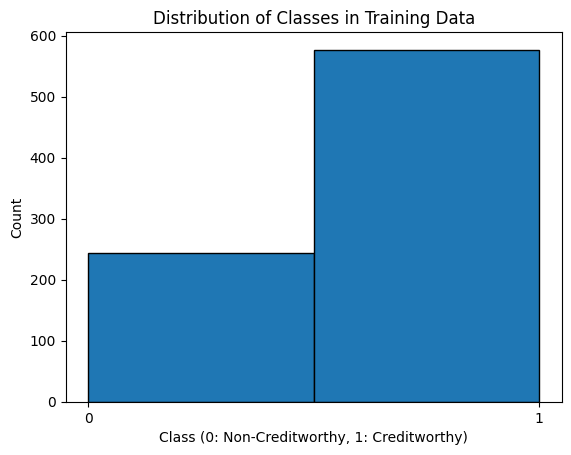

In [239]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [257]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
param_grid_rf = {
    'n_estimators': [50, 150, 200, 250, 300, 350], 
              'criterion': ['gini', 'entropy'], 
              'max_depth': range(5, 21, 1),
              'min_samples_split': [20, 40, 60, 80],
              'min_samples_leaf': [20, 30, 40, 50, 60]
}

search_rf = RandomizedSearchCV(rf, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)
search_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(5, 21),
                                        'min_samples_leaf': [20, 30, 40, 50,
                                                             60],
                                        'min_samples_split': [20, 40, 60, 80],
                                        'n_estimators': [50, 150, 200, 250, 300,
                                                         350]},
                   scoring='roc_auc')

In [241]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [258]:
# Обучение Random Forest
rf_model = RandomForestClassifier(max_depth=100, min_samples_leaf=25, min_samples_split=20,
                       n_estimators=200, max_samples=0.4,
    random_state=42)
rf_model.fit(X_train, y_train)
# feature_importances = rf_model.feature_importances_
# feature_importances_df = pd.DataFrame({'features': list(data.iloc[:, 1:]), 'feature_importances': feature_importances})
# feature_importances_df = feature_importances_df.sort_values(by='feature_importances', ascending=False)
# print(feature_importances_df)
# print(feature_importances_df.iloc[:, :1].squeeze().tolist())

# Прогноз на тестовых данных
# rf_pred = rf_model.predict(X_test)
rf_pred = rf_model.predict_proba(X_test)[:, 1]
# Расчет метрик для Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_pred)
# rf_accuracy = accuracy_score(y_test, rf_pred)
# rf_precision = precision_score(y_test, rf_pred)
# rf_recall = recall_score(y_test, rf_pred)

print("Random Forest метрики:")
print(f"ROC AUC: {rf_roc_auc:.2f}")
# print(f"Accuracy: {rf_accuracy:.2f}")
# print(f"Precision: {rf_precision:.2f}")
# print(f"Recall: {rf_recall:.2f}")

Random Forest метрики:
ROC AUC: 0.81


In [259]:
# Обучение Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Прогноз на тестовых данных
gb_pred = gb_model.predict_proba(X_test)[:, 1]

# Расчет метрик для Gradient Boosting
gb_roc_auc = roc_auc_score(y_test, gb_pred)
# gb_accuracy = accuracy_score(y_test, gb_pred)
# gb_precision = precision_score(y_test, gb_pred)
# gb_recall = recall_score(y_test, gb_pred)

print("\nGradient Boosting метрики:")
print(f"ROC AUC: {gb_roc_auc:.2f}")
# print(f"Accuracy: {gb_accuracy:.2f}")
# print(f"Precision: {gb_precision:.2f}")
# print(f"Recall: {gb_recall:.2f}")


Gradient Boosting метрики:
ROC AUC: 0.80


In [254]:
# Обучение MLP (Multi-Layer Perceptron) нейронной сети
mlp_model = MLPClassifier(hidden_layer_sizes=(30,), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Прогноз на тестовых данных
mlp_pred = mlp_model.predict_proba(X_test)[:, 1]

# Расчет метрик для MLP нейронной сети
mlp_roc_auc = roc_auc_score(y_test, mlp_pred)
# mlp_accuracy = accuracy_score(y_test, mlp_pred)
# mlp_precision = precision_score(y_test, mlp_pred)
# mlp_recall = recall_score(y_test, mlp_pred)

print("\nMLP (Neural Network) метрики:")
print(f"ROC AUC: {mlp_roc_auc:.2f}")
# print(f"Accuracy: {mlp_accuracy:.2f}")
# print(f"Precision: {mlp_precision:.2f}")
# print(f"Recall: {mlp_recall:.2f}")


MLP (Neural Network) метрики:
ROC AUC: 0.65


## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели